In [1]:
import Graphing
import numpy as np
import sympy as sp

In [2]:
N = 30 # cantidad de masas a simular

L = 10       # largo L
T_0 = 4      # tension promedio de la cuerda en reposo
rho = 0.1    # densidad lineal de la cuerda

h = L/(N+1)
c = np.sqrt(T_0/rho)
c_rara = np.sqrt(T_0/(rho*(h**2)))

sp.init_printing()

## Inciso a) - extremos fijos

Tengo por la ecuación clásica de ondas

$$\frac{\partial^{2}\Psi}{\partial t^{2}}=\frac{T_0}{\rho}\frac{\partial^{2}\Psi}{\partial x^{2}}$$

y tomando la aproximación $\frac{\partial^{2}\Psi}{\partial x^{2}}\approx\frac{1}{h^{2}}(\psi_{n+1}(t)-2\psi_{n}(t)+\psi_{n-1}(t))$

$$\frac{\partial\psi}{\partial t}\approx-\frac{T_0}{\rho h^{2}}(2\psi_n-\psi_{n-1}-\psi_{n+1})$$

Que puedo reescribir matricialmente como

$$\ddot{\vec{\psi}}_n+\frac{T_0}{\rho}M\vec{\psi}=0\qquad con \quad M=\begin{bmatrix}2&-1&0&0&...&0\\-1&2&-1&0&...&0\\0&-1&2&-1&...&0\\.&.&&&&.\\.&&.&&&.\\.&&&.&&.\\.&&&&.&.\\0&...&0&-1&2&-1\\0&...&0&0&-1&2\end{bmatrix}$$

Luego, solo resta resolver la ecuacion $det(M-\omega^{2}I)=0$ para obtener los autovalores (que son las frecuencias de los modos normales) y los autovectores (que son las amplitudes de cada masa para cada modo normal)

Puedo modificar la matriz $M$ y los vectores $\ddot{\vec{\psi}}$ y $\vec{\psi}$ de forma tal de añadir masas virtuales $\psi_{0}$ y $\psi_{N+1}$ que hagan las de borde. Para el caso de extemos fijos, ambas masas s mantendrán inmóviles para todo tiempo mientras (como si tuvieran masa infinita) y para el caso de extremos fijo-libre, $\psi_0$ se mantendra quita mientras que $\psi_{N+1}$ describirá una trayectoria igual a la de $\psi_N$ (como si tuviera masa nula). De esta manera podemos redefinir M como:

$$M=\begin{bmatrix}0&0&0&0&0&...&0&0\\-1&2&-1&0&0&...&0&0\\0&-1&2&-1&0&...&0&0\\0&0&-1&2&-1&...&0&0\\.&.&&&&&&.\\.&&.&&&&&.\\.&&&.&&&&.\\.&&&&.&&&.\\.&&&&&.&&.\\.&&&&&&.&.\\0&0&...&0&-1&2&-1&0\\0&0&...&0&0&-1&2&-1\\0&0&...&0&0&0&0&0\end{bmatrix}$$

In [3]:
### crear matriz M ###
def construccion_matriz_ff(i, j):
    if (i == 1 and j == 0) or (i == N-1 and j == N):
        return -c_rara
    elif i == 0 or j == 0 or i == N or j == N:
        return 0
    elif i == j:
        return 2*c_rara
    elif i+1 == j:
        return -c_rara
    elif i-1 == j:
        return -c_rara
    else:
        return 0

M_ff = sp.Matrix(N+1,N+1,construccion_matriz_ff)
#print('La matriz "M" para el caso fijo-fijo es:\n')
#sp.pprint(M_ff)

In [4]:
### encontrar auto-cosas ###

eigenvals_ff = [] # los autovalores son las frecuencias cuadradas
eigenvects_ff = []
sympyResult = M_ff.eigenvects()
for eigenvect in sorted(sympyResult, key=lambda x: x[0]):
    eigenvals_ff.append(eigenvect[0])
    eigenvects_ff.append(eigenvect[2][0])

# si esto es falso es que hay multiplicidades distintas de uno y hay quilombo
assert (N+1 == len(eigenvals_ff) and len(eigenvals_ff) == len(eigenvects_ff))

In [5]:
### Graficar ###
# Modos

X = np.array(range(len(eigenvects_ff)))
Ys = []

for i in eigenvects_ff:
    Ys.append([])
    for j in i:
        Ys[-1].append(float(j))

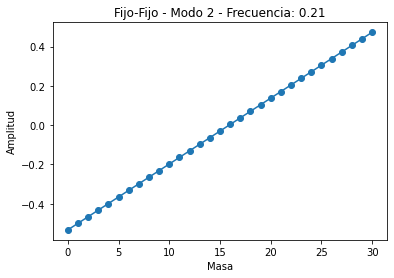

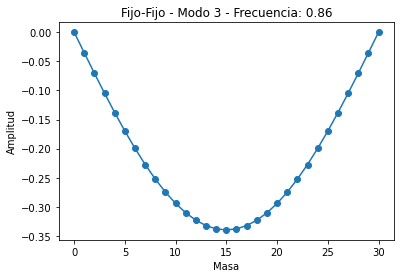

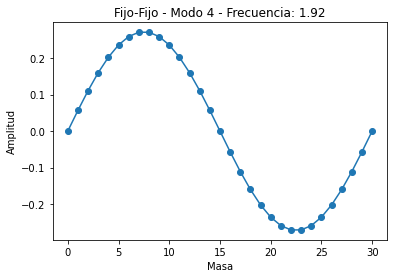

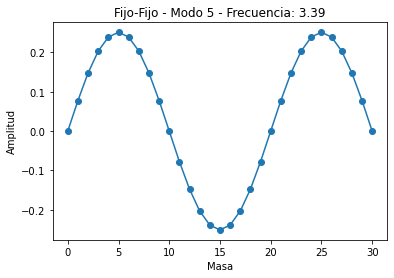

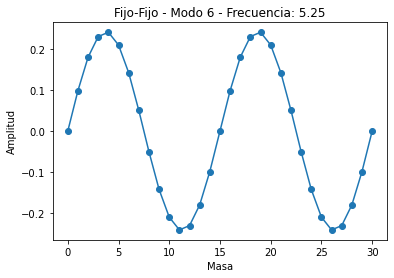

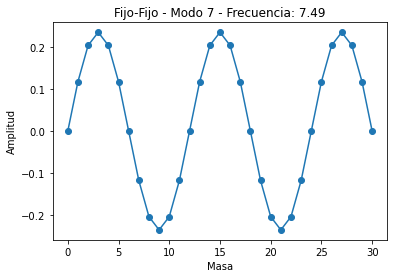

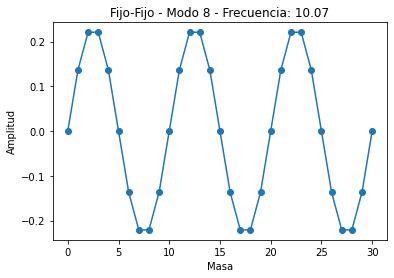

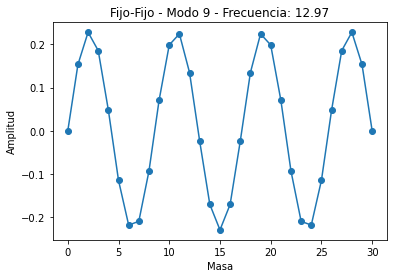

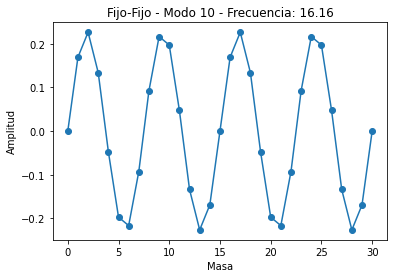

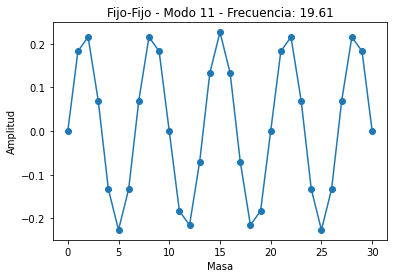

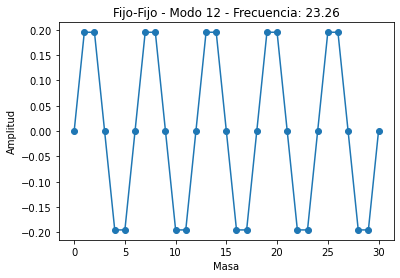

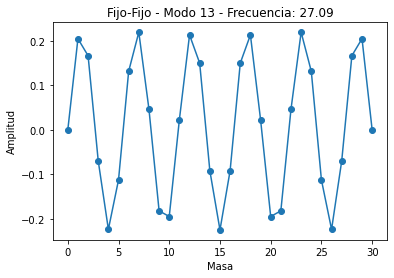

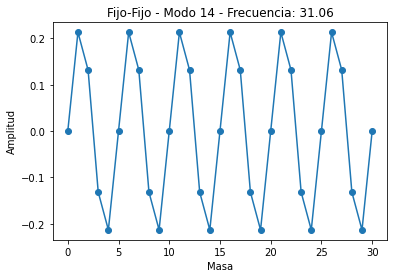

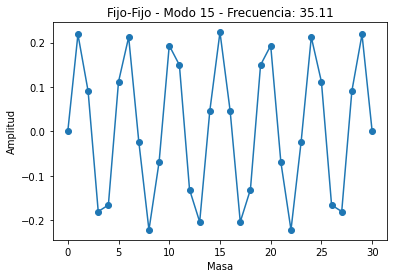

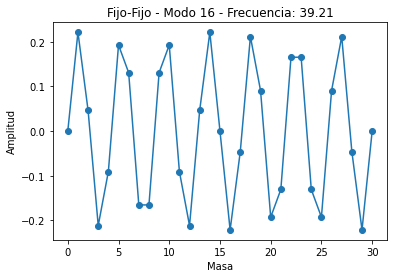

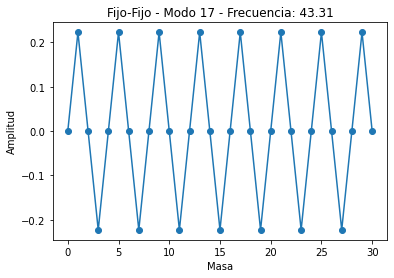

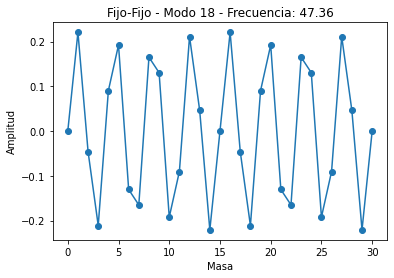

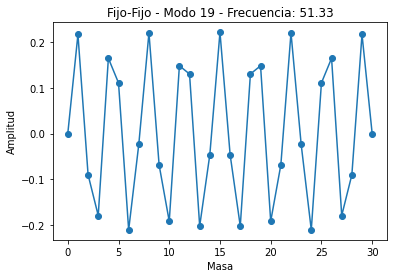

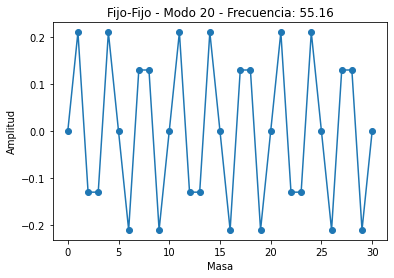

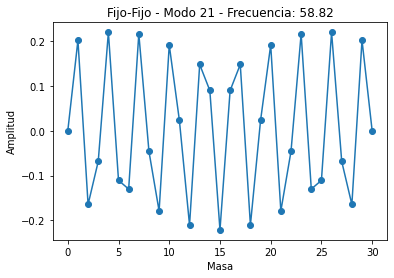

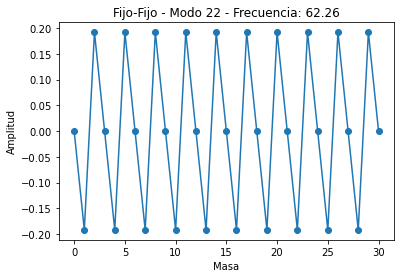

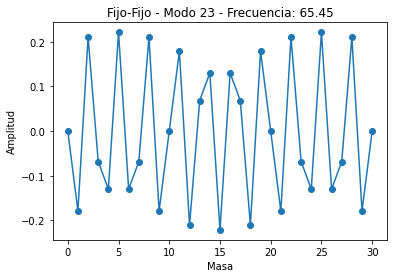

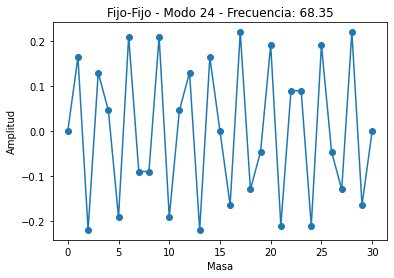

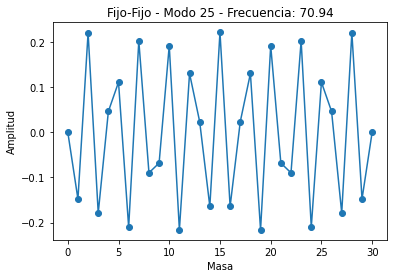

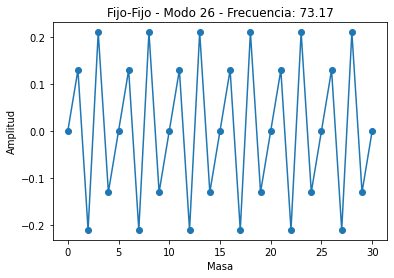

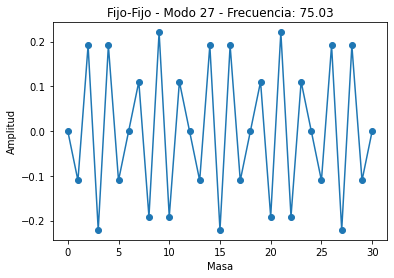

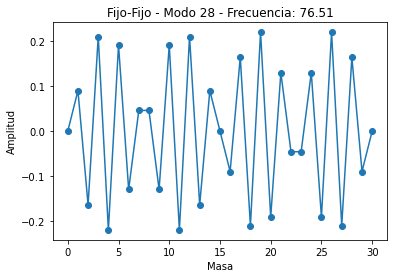

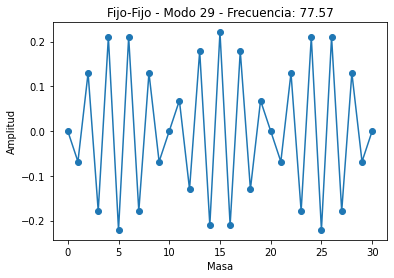

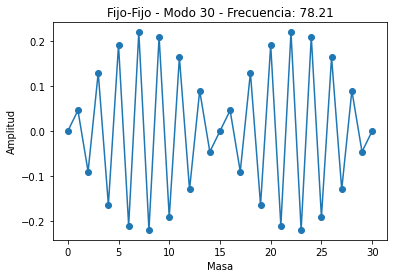

In [6]:
g_ff = Graphing.Graphing2D(X, Ys)

positiveFreqs = len([e for e in eigenvals_ff if e > 0])
negativeFreqs = len(eigenvals_ff) - positiveFreqs
for p in range(negativeFreqs, positiveFreqs + negativeFreqs): # cada frecuencia positiva de cada modo normal
    g_ff.add_plot(0, p)
    g_ff.add_scatter()
    g_ff.set_labels('Masa', 'Amplitud')
    g_ff.set_title('Fijo-Fijo - Modo {0} - Frecuencia: {1}'.format(p, round(eigenvals_ff[p], 2)))
    g_ff.show()
    
# NO SE QUE QUIERE CUANDO PIDE QUE RELACIONEMOS LOS AUTOVALORES CON LA 
# FRECUENCIA NATURAL (QUE ES LA FRECUENCIA NATURAL? LA FRECUENCIA DEL MODO 1?)

# TAMPOCO SE QUE QUIERE CUANDO PIDE RELACIONAR LOS AUTOVALS CON LAS LONGITUDES DE ONDA

## Inciso a) - extremos fijo-libre

De manera similar al caso de extremos fijos se toma arma una matriz, que, agregando las masas virtuales ($\psi_0=0\forall t$ y $\psi_{N+1}=\psi_N\forall t$) resulta:

$$M=\begin{bmatrix}0&0&0&0&0&...&0&0\\-1&2&-1&0&0&...&0&0\\0&-1&2&-1&0&...&0&0\\0&0&-1&2&-1&...&0&0\\.&.&&&&&&.\\.&&.&&&&&.\\.&&&.&&&&.\\.&&&&.&&&.\\.&&&&&.&&.\\.&&&&&&.&.\\0&0&...&0&-1&2&-1&0\\0&0&...&0&0&-1&2&0\\0&0&...&0&0&-1&2&0\end{bmatrix}$$

In [7]:
### crear matriz M ###
def construccion_matriz_fl(i, j):
    if (i == 1 and j == 0):
        return -c
    elif i == N:
        if j == N-2:
            return -c
        elif j == N-1:
            return 2*c
        else:
            return 0
    elif i == 0 or j == 0 or i == N or j == N:
        return 0
    elif i == j:
        return 2*c
    elif i+1 == j:
        return -c
    elif i-1 == j:
        return -c
    else:
        return 0
    
M_fl = sp.Matrix(N+1,N+1,construccion_matriz_fl)
#print('La matriz "M" para el caso fijo-fijo es:\n')
#sp.pprint(M_fl)

In [8]:
### encontrar auto-cosas ###

eigenvals_fl = [] # los autovalores son las frecuencias cuadradas
eigenvects_fl = []
sympyResult = M_fl.eigenvects()
for eigenvect in sorted(sympyResult, key=lambda x: x[0]):
    eigenvals_fl.append(eigenvect[0])
    eigenvects_fl.append(eigenvect[2][0])

# si esto es falso es que hay multiplicidades distintas de uno y hay quilombo
assert (N+1 == len(eigenvals_fl) and len(eigenvals_fl) == len(eigenvects_fl))

In [9]:
### Graficar ###
# Modos

X = np.array(range(len(eigenvects_fl)))
Ys = []

for i in eigenvects_fl:
    Ys.append([])
    for j in i:
        Ys[-1].append(float(j))

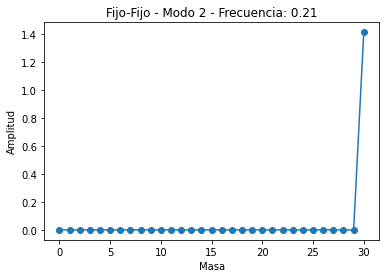

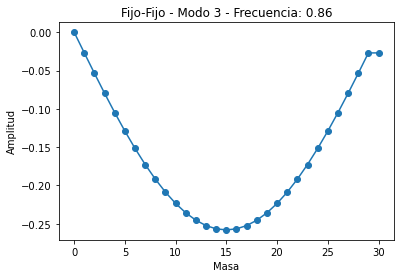

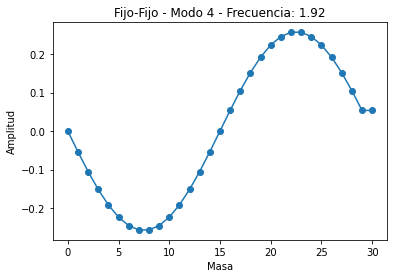

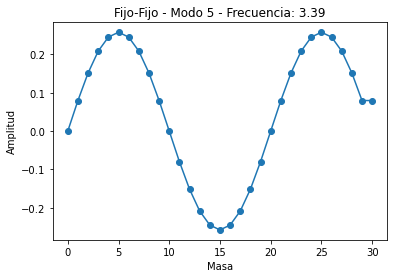

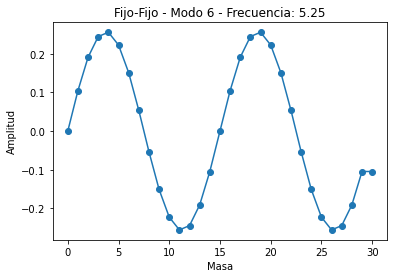

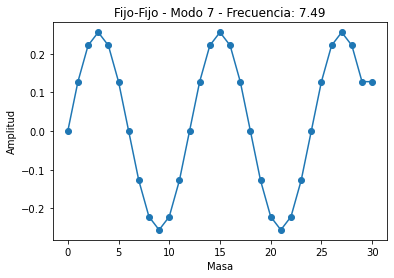

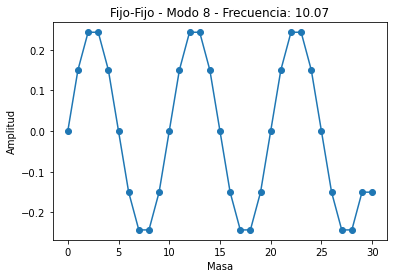

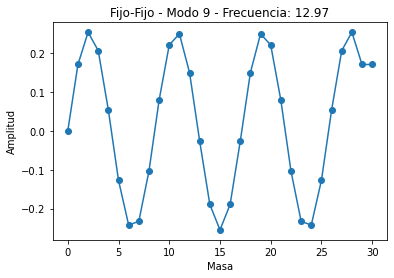

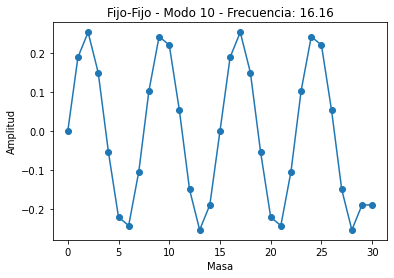

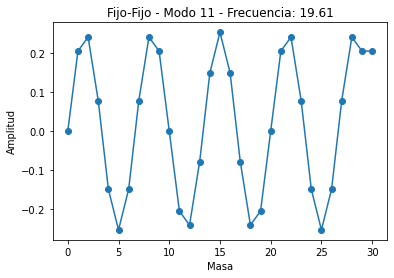

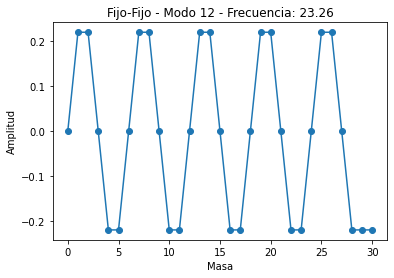

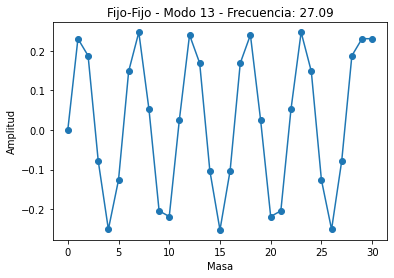

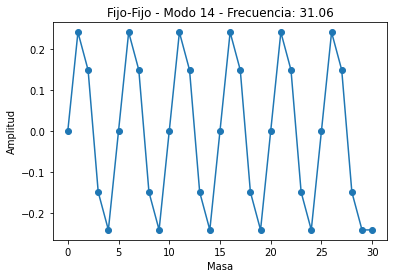

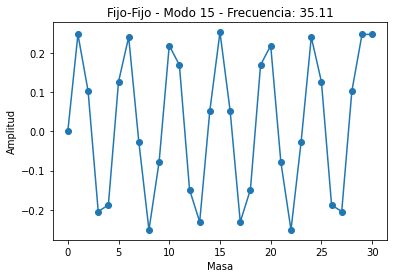

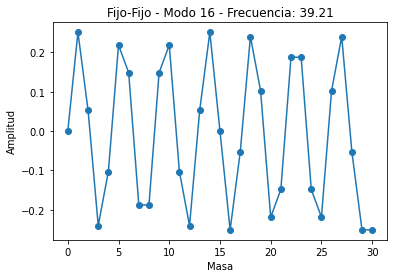

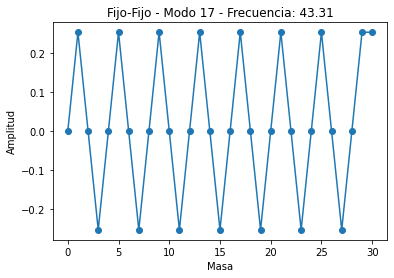

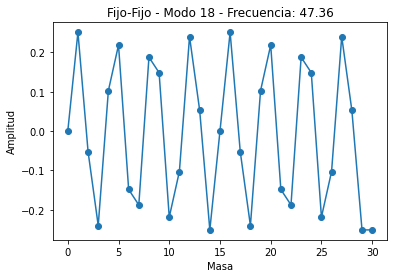

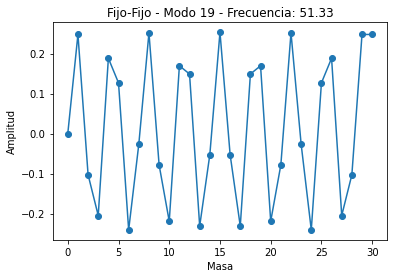

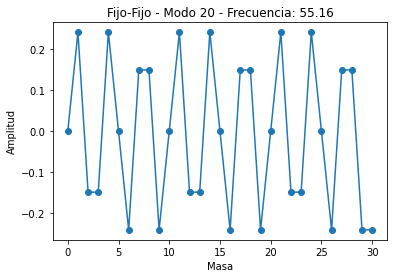

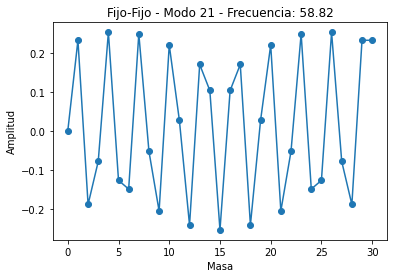

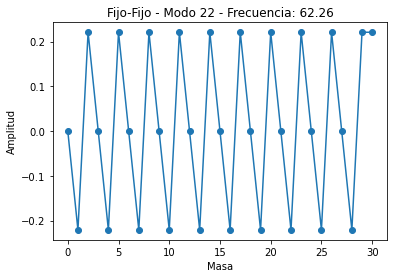

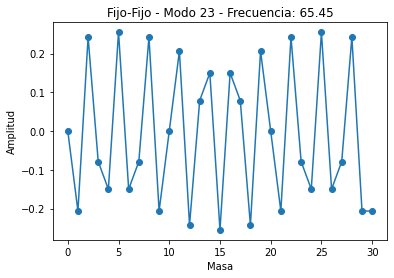

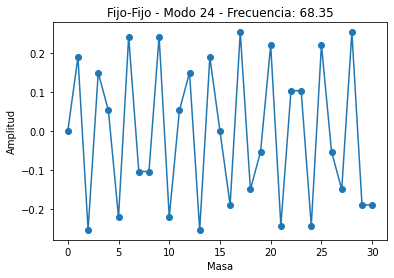

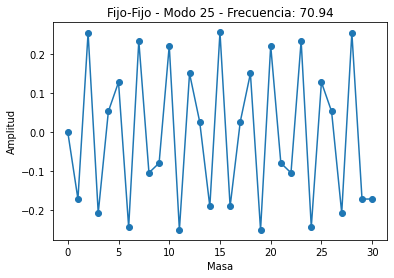

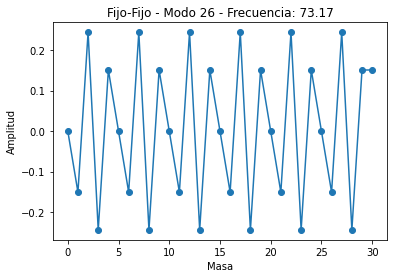

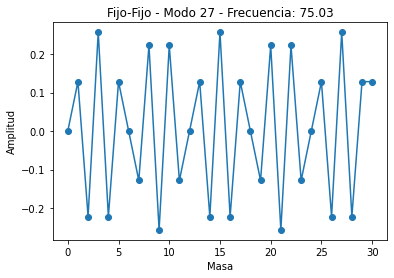

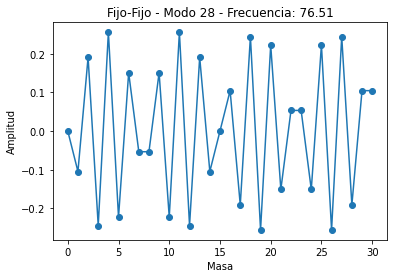

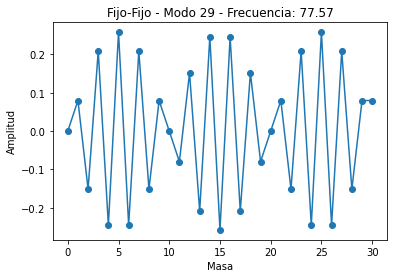

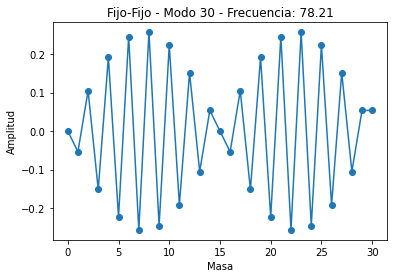

In [10]:
g_fl = Graphing.Graphing2D(X, Ys)

positiveFreqs = len([e for e in eigenvals_fl if e > 0])
negativeFreqs = len(eigenvals_fl) - positiveFreqs
for p in range(negativeFreqs, positiveFreqs + negativeFreqs): # cada frecuencia positiva de cada modo normal
    g_fl.add_plot(0, p)
    g_fl.add_scatter()
    g_fl.set_labels('Masa', 'Amplitud')
    g_fl.set_title('Fijo-Fijo - Modo {0} - Frecuencia: {1}'.format(p, round(eigenvals_ff[p], 2)))
    g_fl.show()